# Exercise 1
## Measure the speedup and efficiency for multiple problem and machine sizes as in previous exercises.

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def getDataFor(path):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        return [[int(row[0]),int(row[1]), float(row[2])] for row in csv_reader]

def chunk(it, size):
    it = iter(it)
    return list(iter(lambda: tuple(islice(it, size)), ()))


def sortData(list):
    a = []
    b = []
    c = []
    d = []
    for i in range(0,len(list),4):
        a = [list[i]] + a
        b = [list[i+1]] + b
        c = [list[i+2]] + c
        d = [list[i+3]] + d
    return [a,b,c,d]


#Vary the number of steps with const bodies=100
#Vary the number of bodies with const number of steps=10000
testsPerSlot = 4
varBodyData = sortData(getDataFor('varyBodies.csv'))
varStepsData = sortData(getDataFor('varySteps.csv'))

print(varBodyData[0])

[[1, 10, 0.05576], [2, 10, 0.050653], [4, 10, 0.058036], [8, 10, 0.080807], [16, 10, 0.072598]]


### Speedup
- absolut: reference ts is the fastest sequential version
- relativ: reference ts is the fastest parallel version run sequentially
$$ speedup_p = \frac{t_s}{t_p} $$

### Efficency
$$ efficency = \frac{speedup_p}{p} $$

In [25]:
def plot2(ax1, data, title = ""):
    cores = [1,2,4,8,16]
    ax2 = ax1.twinx()
    for problemSize in range(0,3):
        

        cores = [ i[0] for i in data[problemSize] ]
        reference = data[problemSize][0][2]
        speedup = [ reference/i[2] for i in data[problemSize] ]
        efficency = [ speedup[i] / cores[i] for i in range(0,len(cores)) ]
        ax1.set_xlabel('number of processors')
        ax1.set_ylabel('Speedup')
        ax1.set_title(title)
        ax1.plot(cores, speedup, label="Speedup {}".format(data[problemSize][1][1]) , marker='o',  linewidth=3, color=['red','green', 'blue'][problemSize])
        ax2.set_ylabel("Efficency")
        ax2.plot( cores, efficency, label="Efficency {}".format(data[problemSize][1][1]), marker='o', color=['orange','aquamarine','chartreuse'][problemSize], linewidth=3)
        ax1.legend(loc='lower left')
        ax2.legend()


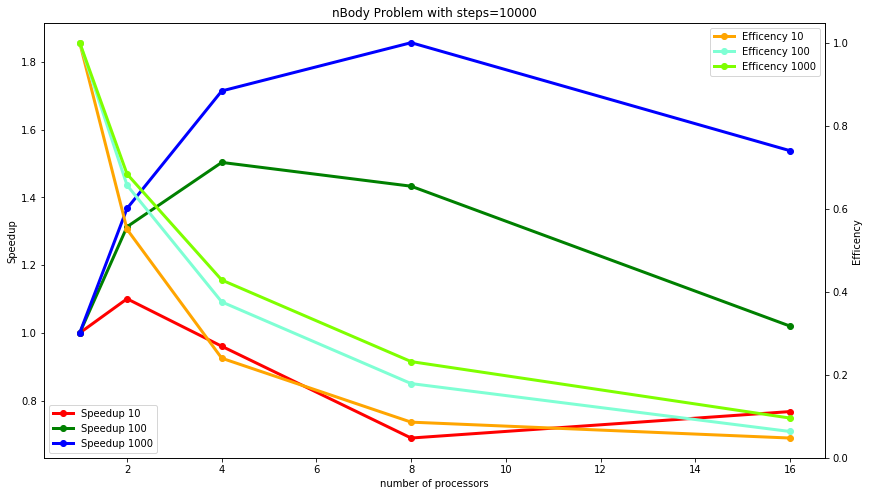

In [28]:
plt.rcParams["figure.figsize"] = (14,8)
fig, ax1 = plt.subplots(1,1)
plot2(ax1, varBodyData, "nBody Problem with steps=10000")
plt.show() 

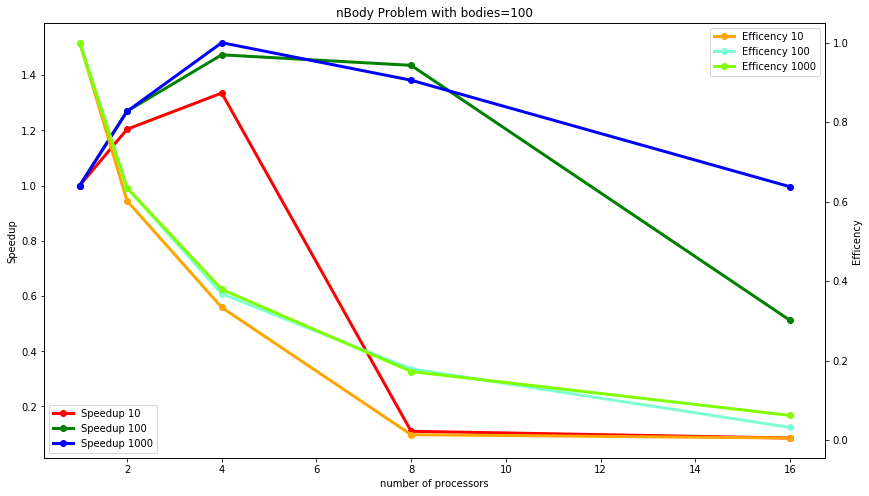

In [29]:
fig, ax1 = plt.subplots(1,1)
plot2(ax1, varStepsData, "nBody Problem with bodies=100")

plt.show() 

Note: 
- All tests are done with MPI Version 3.1.1
- Time mesurements are done with the MPI function MPI_Wtime()